> FIFA23 선수 데이터에서 결측치를 처리하고 여러 열을 가공하여 시각화해보자!

## 1. 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

## 2. 학습할 코드

### **A. `dropna()`**
---
\- 행에서 결측치가 하나라도 있으면 제거한다.

In [2]:
df = pd.DataFrame({
    'A': [1,2,3,np.nan,5,6,7],
    'B': [11,np.nan,33,np.nan,55,66,77], 
    'C': [111,222,333,np.nan,555,666,np.nan]})
df

,A,B,C
0,1.0,11.0,111.0
1,2.0,NaN,222.0
2,3.0,33.0,333.0
3,NaN,NaN,NaN
4,5.0,55.0,555.0
5,6.0,66.0,666.0
6,7.0,77.0,NaN


> 이러한 데이터가 있다고 할 때...

In [5]:
df.dropna()

,A,B,C
0,1.0,11.0,111.0
2,3.0,33.0,333.0
4,5.0,55.0,555.0
5,6.0,66.0,666.0


> 결측치가 하나라도 있는 행은 모두 드롭된다. (원본 데이터 손상 X)

### **B. `_`**
---

\- 파이썬에서 가장 최근 콘솔에 띄워진 결과는 `_`로 불러올 수 있다.

In [6]:
a = [1,2,3]
a + [4] 

[1, 2, 3, 4]

In [7]:
_

[1, 2, 3, 4]

In [8]:
_ + [5]

[1, 2, 3, 4, 5]

In [9]:
_.pop()  ## 마지막 요소를 리턴하고 그 요소는 삭제

5

In [10]:
_ + 1

6

> 리스트에서 숫자까지... `_`의 다사다난한 모험

## 3. FIFA23 시각화 문제

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


포지션별로 선수들의 능력치(ShotPower,SlidingTackle)와 급여(Wage)를 시각화하고 싶다. 아래의 세부지침에 맞추어 포지션별 ShotPower와 SlidingTackle의 산점도를 그려라.

In [16]:
df.Position

0        <span class="pos pos18">CAM
1        <span class="pos pos11">LDM
2         <span class="pos pos24">RS
3        <span class="pos pos13">RCM
4          <span class="pos pos7">LB
                    ...             
16705    <span class="pos pos29">RES
16706    <span class="pos pos29">RES
16707    <span class="pos pos29">RES
16708    <span class="pos pos28">SUB
16709    <span class="pos pos28">SUB
Name: Position, Length: 16710, dtype: object

세부지침

**A**. Column의 이름에서 공백을 제거하라.

**B**. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에 `.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.

**C**. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라. 변환된 값을 `df.Position`에 저장하라.

In [3]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}

**D**. `df.Wage`를 적절하게 변환하라.

**E**. `Position==“DEFENDER” or Position==“FORWARD”`에 해당하는 관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라. 이때 `Position`은 `color`로 구분하고 `Wage`는 `size`와 `alpha`로 구분하라.

시각화 예시

![](https://guebin.github.io/DV2023/posts/05wk-supp_files/figure-html/cell-13-output-1.png)

## 4. FIFA23 시각화 - 풀이

### **A. Column의 이름에서 공백을 제거하라.**
---

In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [5]:
df.columns.str.replace(' ', '')

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'BestPosition', 'BestOverallRating', 'ReleaseClause',
       'DefensiveAwareness'],
      dtype='object')

In [6]:
df.set_axis(df.columns.str.replace(' ', ''), axis = 1).columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'BestPosition', 'BestOverallRating', 'ReleaseClause',
       'DefensiveAwareness'],
      dtype='object')

> 공백이 없어진 것을 확인할 수 있다.

### **B. 결측치가 50%이상인 컬럼을 찾고 이를 제거하라. 그 뒤에 `.dropna()`를 사용하여 결측치가 포함된 행을 제거하라.**
---

In [7]:
df_b = df.set_axis(df.columns.str.replace(' ', ''), axis = 1)

In [8]:
df_b.loc[:, df_b.isna().mean() >= 0.5].columns

Index(['LoanedFrom', 'Marking'], dtype='object')

> 위 두 개의 컬럼이 결측치가 50% 이상이다.

In [10]:
df_b.loc[:, df_b.isna().mean() < 0.5].dropna()
##df_b.loc[:, [s < 0.5 for s in df_b.isna().mean()]].dropna()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


> 따라서 해당 조건에 반대를 슬라이싱하는 방식으로 해당 컬럼을 제거하였다.

### **C. `position_dict`를 이용하여 `df.Position`을 적절하게 변환하라. 변환된 값을 `df.Position`에 저장하라.**
---

In [13]:
position_dict

{'GOALKEEPER': {'GK'},
 'DEFENDER': {'CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'},
 'MIDFIELDER': {'CAM',
  'CDM',
  'CM',
  'LAM',
  'LCM',
  'LDM',
  'LM',
  'RAM',
  'RCM',
  'RDM',
  'RM'},
 'FORWARD': {'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'},
 'SUB': {'SUB'},
 'RES': {'RES'}}

In [15]:
df_c = df_b.loc[:, df_b.isna().mean() < 0.5].dropna()
df_c.Position

0        <span class="pos pos18">CAM
1        <span class="pos pos11">LDM
2         <span class="pos pos24">RS
3        <span class="pos pos13">RCM
4          <span class="pos pos7">LB
                    ...             
16703    <span class="pos pos29">RES
16704    <span class="pos pos29">RES
16706    <span class="pos pos29">RES
16707    <span class="pos pos29">RES
16708    <span class="pos pos28">SUB
Name: Position, Length: 14398, dtype: object

> 뒤의 `>`를 제외한 문자열을 추출해서 바꿔줘야 할 것 같다.

In [17]:
df_c.assign(Position = df_c.Position.str.split('>').str[-1]).Position

0        CAM
1        LDM
2         RS
3        RCM
4         LB
        ... 
16703    RES
16704    RES
16706    RES
16707    RES
16708    SUB
Name: Position, Length: 14398, dtype: object

> 뒤의 문자열만 추출

\- 무지성으로 쥐어짜내본 아이디어

In [20]:
x = df_c.Position.str.split('>').str[-1][2]
lst = [i != 0 for i in [key if x in value else 0 for key, value in position_dict.items()]];lst

[False, False, False, True, False, False]

In [21]:
[i != 0 for i in [key if x in value else 0 for key, value in position_dict.items()]].index(True)

3

In [22]:
lst = [[key if i in value else np.nan if i == np.nan else 1 for key, value in position_dict.items()] for i in df_c.Position.str.split('>').str[-1]]

> `value`와 같은 값이면 `key`, 아니면 `1`, 결측치면 `np.nan`을 넣어줘봤음.

In [23]:
def cutting_1(lst):
    for i in lst:
        if i != 1:
            return i

Position_s = pd.Series(lst).apply(cutting_1); Position_s

0        MIDFIELDER
1        MIDFIELDER
2           FORWARD
3        MIDFIELDER
4          DEFENDER
            ...    
14393           RES
14394           RES
14395           RES
14396           RES
14397           SUB
Length: 14398, dtype: object

> 잘 된듯~(근데 앞에서 .dropna()를 안해서 쓸데없는 코드까지 작성해버렸다.)~

In [251]:
lst_2 = list(map(lambda x : [key for key, value in position_dict.items() if x in value], df_c.Position.str.split('>').str[-1]))
## [i[0] for i in lst_2] : 왜인지 안됨
## [i.pop() for i in lst_2] : 이건 뭐 객체 저장인지 뭔지 문제라는데, 다른 변수에 copy()해서 넣어봐도 안됨

In [27]:
df_c.reset_index(drop = True).assign(Position = Position_s).Position

0        MIDFIELDER
1        MIDFIELDER
2           FORWARD
3        MIDFIELDER
4          DEFENDER
            ...    
14393           RES
14394           RES
14395           RES
14396           RES
14397           SUB
Name: Position, Length: 14398, dtype: object

* 잘못된 코드

In [318]:
df_c.assign(Position = Position_s).Position  ## 문제가 있는 코드, reset_index(drop = True)를 안해줘서 인덱스가 꼬임

0        MIDFIELDER
1        MIDFIELDER
2           FORWARD
3        MIDFIELDER
4          DEFENDER
            ...    
16703           NaN
16704           NaN
16706           NaN
16707           NaN
16708           NaN
Name: Position, Length: 14398, dtype: object

> 뭘 잘못했는 지 알겠지? index가 달라서 값이 엮이지가 않잖아...

\- 매우 간단한 교수님의 해법

In [313]:
df.set_axis(df.columns.str.replace(' ',''),axis=1)\
.loc[:,lambda _df: _df.isna().mean()<0.5].dropna()\
.assign(Position = lambda _df: _df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


> 아마도 모든 문제의 원흉은 `dropna()`를 하지 않은 너에게 있었다. (결측치가 있으면 작동이 힘든가봄)

### **D. `df.Wage`를 적절하게 변환하라.**
---

In [319]:
df.Wage

0        €250K
1        €140K
2        €135K
3        €350K
4         €45K
         ...  
16705      €1K
16706     €550
16707     €700
16708     €500
16709       €0
Name: Wage, Length: 16710, dtype: object

> 시각화 해주려면 숫자형 자료여야 하는데, 범주형으로 들어가있다.

\- 앞의 유로를 없애고, K는 1000을 곱해주자.

In [28]:
df_d = df_c.reset_index(drop = True).assign(Position = Position_s)

In [29]:
df_d.Wage.str.replace('€','').str.replace('K','000')
##[int(i) if i[-1] != 'K' else int(i.replace('K',''))*1000 for i in df_d.Wage.str.replace('€','')]와 동일

0        250000
1        140000
2        135000
3        350000
4         45000
          ...  
14393       650
14394       950
14395       550
14396       700
14397       500
Name: Wage, Length: 14398, dtype: object

In [30]:
df_d.assign(Wage = df_d.Wage.str.replace('€','').str.replace('K','000').astype(int)).Wage

0        250000
1        140000
2        135000
3        350000
4         45000
          ...  
14393       650
14394       950
14395       550
14396       700
14397       500
Name: Wage, Length: 14398, dtype: int32

> 잘 된 것을 볼 수 있다.

### **E. `Position==“DEFENDER” or Position==“FORWARD”`에 해당하는 관측치를 고른 뒤 x축에 `ShotPower`, y축에 `SlidingTackle`을 시각화하라. 이때 `Position`은 `color`로 구분하고 `Wage`는 `size`와 `alpha`로 구분하라.**
---

In [31]:
df_e = df_d.assign(Wage = df_d.Wage.str.replace('€','').str.replace('K','000').astype(int))

In [32]:
df_e.loc[(df_e.Position == "DEFENDER") | (df_e.Position == "FORWARD")]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BestPosition,BestOverallRating,ReleaseClause,DefensiveAwareness
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
11,155862,Sergio Ramos,35,https://cdn.sofifa.com/players/155/862/22_60.png,Spain,https://cdn.sofifa.com/flags/es.png,88,88,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,91.0,11.0,8.0,9.0,7.0,11.0,CB,88.0,€44.4M,84.0
12,197445,D. Alaba,29,https://cdn.sofifa.com/players/197/445/22_60.png,Austria,https://cdn.sofifa.com/flags/at.png,84,84,Real Madrid CF,https://cdn.sofifa.com/teams/243/30.png,...,82.0,5.0,7.0,14.0,15.0,9.0,CB,84.0,€72.8M,86.0
20,210514,João Cancelo,27,https://cdn.sofifa.com/players/210/514/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,86,87,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,80.0,6.0,9.0,15.0,14.0,14.0,RB,86.0,€137.6M,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13109,203430,G. Ray,27,https://cdn.sofifa.com/players/203/430/22_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,59,60,Exeter City,https://cdn.sofifa.com/teams/143/30.png,...,59.0,13.0,10.0,12.0,9.0,8.0,CB,60.0,€420K,58.0
13124,187154,N. Canavan,30,https://cdn.sofifa.com/players/187/154/22_60.png,Republic of Ireland,https://cdn.sofifa.com/flags/ie.png,63,63,Bradford City,https://cdn.sofifa.com/teams/1804/30.png,...,62.0,6.0,10.0,11.0,14.0,6.0,CB,63.0,€700K,63.0
13183,263968,K. Sow,18,https://cdn.sofifa.com/players/263/968/22_60.png,Switzerland,https://cdn.sofifa.com/flags/ch.png,54,76,FC Lausanne-Sport,https://cdn.sofifa.com/teams/1862/30.png,...,55.0,6.0,9.0,13.0,7.0,14.0,CB,56.0,€796K,54.0
13238,263022,M. Rosenfelder,18,https://cdn.sofifa.com/players/263/022/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,57,71,SC Freiburg II,https://cdn.sofifa.com/teams/110691/30.png,...,60.0,10.0,10.0,8.0,10.0,11.0,CB,59.0,€726K,58.0


In [33]:
tidydata = df_e.loc[(df_e.Position == "DEFENDER") | (df_e.Position == "FORWARD")]

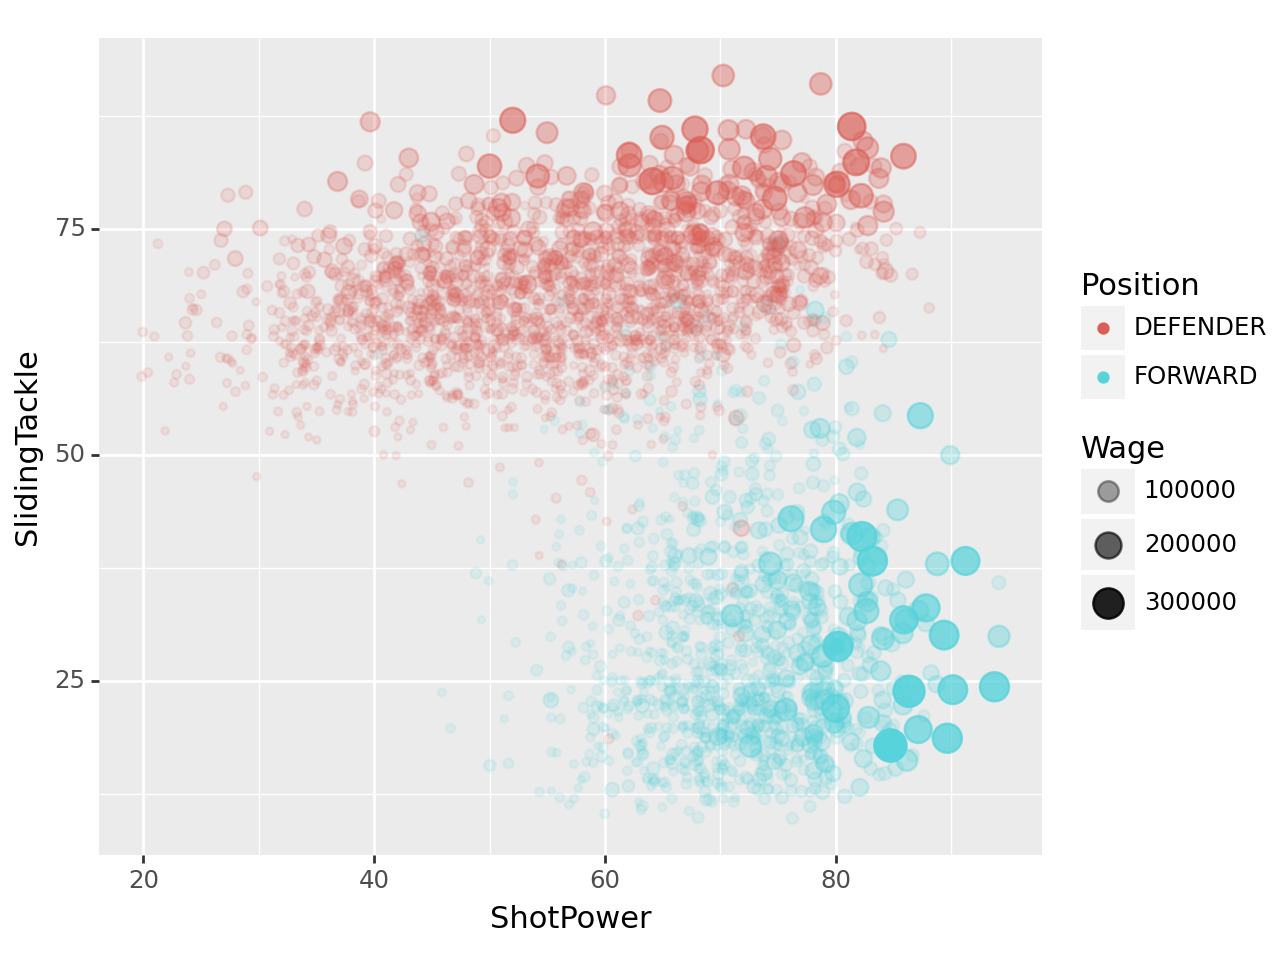

<Figure Size: (640 x 480)>

In [34]:
fig = ggplot(tidydata)
point = geom_point(aes(x = 'ShotPower', y = 'SlidingTackle', color = 'Position', size = 'Wage', alpha = 'Wage'), position = 'jitter')

fig + point

> 해치웠나...?

**결론**
---
\- 데이터의 결측치를 반드시 먼저 처리하고 하자!(`dropna()`의 필요성)

\- `pop()`을 사용하기 전에는 결측치를 반드시 모두 없애자!

\- 데이터를 가공하여 순서가 바뀐 경우 왠만해선 인덱스를 초기화해주자!(`reset_index()`의 필요성)